In [1]:
import numpy as np
import scipy as sp
from sympy import Symbol, cos, Piecewise, plot, sign, sqrt,Rational
import sys
import matplotlib.pyplot as plt
import resource
from IPython.display import display

from ggqpy.functionfamiliy import Interval, FunctionFamily
from ggqpy.testproblems import example_problem, gen_poly_and_sing
from ggqpy.discretize import Discretizer
from ggqpy.compress import compress_sequence_of_functions, construct_Chevyshev_quadratures, visualise_diagonal_dropoff
from ggqpy.optimize import QuadOptimizer

resource.setrlimit(resource.RLIMIT_STACK, [0x10000000, resource.RLIM_INFINITY])
sys.setrecursionlimit(0x100000)

In [2]:
eps_disc = 1
eps_comp = 1e2*eps_disc
eps_quad = 1e-2
I = Interval(-1,1)
seed = 0

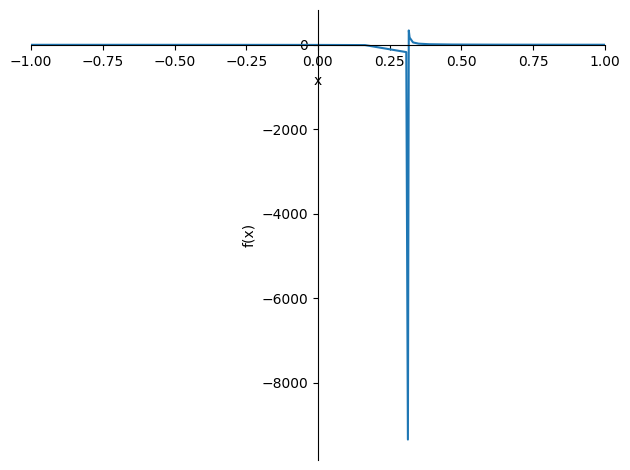

In [3]:
x = Symbol("x")
y = x - 0.314
# limit = 1e-3
# f = cos(y)/Piecewise((abs(y), y < -limit), (y, y > limit), (limit, True))**Rational(1,10)
f = cos(y)/y
F = FunctionFamily(I, [f])
plot(f, xlim = (-1,1))

In [4]:
number_of_points=2
disc = Discretizer(eps_disc, min_length=1e-1, interpolation_degree=number_of_points,verbose=True) 
x_disc, w_disc, endpoints, intervals = disc.adaptive_discretization(F)

Residual:  1707.5976131217883  found on interval  (-1,1)
Residual:  0.24226443086724705  found on interval  (-1,0.0)
Residual:  4686.02848440961  found on interval  (0.0,1)
Residual:  2643.1739698473493  found on interval  (0.0,0.5)
Residual:  6.697543814289284  found on interval  (0.0,0.25)
Residual:  0.030548927695611374  found on interval  (0.0,0.125)
Residual:  2.8425377968183287  found on interval  (0.125,0.25)
Residual:  0.029864694872542626  found on interval  (0.125,0.1875)
Residual:  0.7139630607773433  found on interval  (0.1875,0.25)
Residual:  4469.724227320155  found on interval  (0.25,0.5)
Residual:  5648.874831035849  found on interval  (0.25,0.375)
Residual:  5399.890826332574  found on interval  (0.25,0.3125)
Residual:  33960.31885575276  found on interval  (0.3125,0.375)
Residual:  3.3783161189639133  found on interval  (0.375,0.5)
Residual:  0.8787272150255869  found on interval  (0.375,0.4375)
Residual:  0.033619949069966196  found on interval  (0.4375,0.5)
Residual

[-1, 0.0, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375, 0.5, 1]
36
[-0.93, -0.67, -0.33, -0.07, 0.01, 0.04, 0.08, 0.12, 0.13, 0.15, 0.17, 0.18, 0.19, 0.21, 0.23, 0.25, 0.25, 0.27, 0.29, 0.31, 0.32, 0.33, 0.35, 0.37, 0.38, 0.4, 0.42, 0.43, 0.44, 0.46, 0.48, 0.5, 0.53, 0.67, 0.83, 0.97]


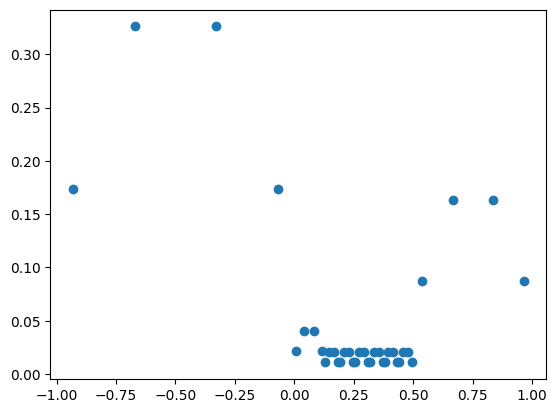

In [5]:
print(endpoints)
print(len(x_disc))
print(list(np.around(x_disc,2)))
plt.scatter(x_disc,w_disc)